# We will perform analysis on NBA player statistics to determine which birth states had the most nba players

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
players = pd.read_csv('Players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


We will drop the unnamed column since it is the same as the index and the birth_city since it is irrelevant for our analysis

In [3]:
players.drop(['Unnamed: 0', 'birth_city'],inplace=True,axis=1)

In [4]:
players.head()

,Player,height,weight,collage,born,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Kentucky


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 6 columns):
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_state    3439 non-null object
dtypes: float64(3), object(3)
memory usage: 183.9+ KB


In [7]:
players = players[pd.notnull(players['birth_state'])]
players.head()

,Player,height,weight,collage,born,birth_state
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Kentucky
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Jersey


In [25]:
group_state = players.groupby('birth_state',as_index = False)['Player'].count()
group_state.sort_values(by = ['Player'],inplace = True, ascending = False)
group_state.reset_index(inplace = True,drop = True)
group_state.head()

,birth_state,Player
0,California,344
1,New York,290
2,Illinois,209
3,Pennsylvania,163
4,Ohio,137


[Text(0, 0, 'California'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Alabama'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'District of Columbia'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Massachusetts')]

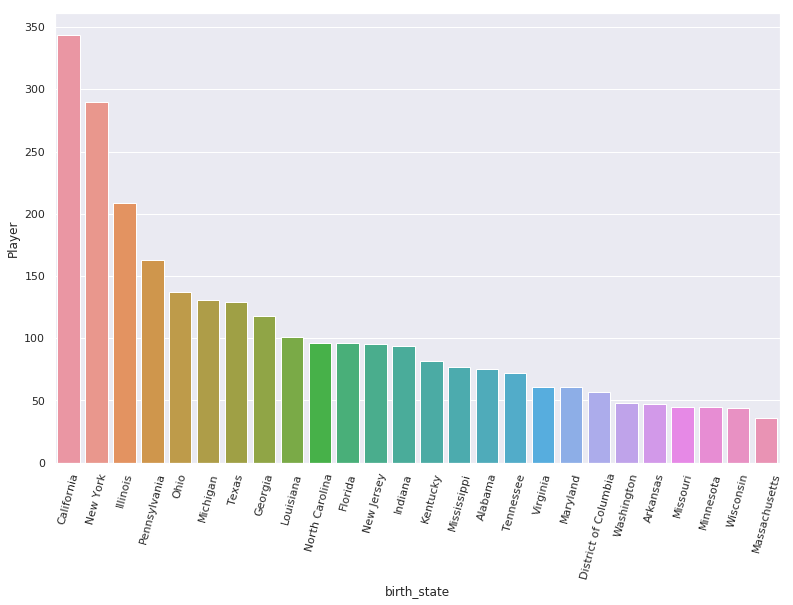

In [35]:
states = group_state.loc[:25]
sns.set(rc={'figure.figsize':(13,8.27)})
g = sns.barplot(x = 'birth_state', y = 'Player', data = states)
g.set_xticklabels(g.get_xticklabels(), rotation = 75)

We should note that states with higher populations should produce more players than smaller states.  Our next step is to determine player per population to see which states have the highest player per population.  We will assume a constant population for each state.  